In [1]:
%load_ext autoreload
%autoreload 2
import dotenv
dotenv.load_dotenv()

True

# Load trainer

In [3]:
from experimentator import build_experiment, find

exp = build_experiment(find("../configs/ballsize.py"), load_weights=False)

../configs/ballsize.py found in /import/home/gva/repositories/deepsport/notebooks/../configs/ballsize.py
ball_views.pickle found in /home/gva/repositories/deepsport/basketball-instants-dataset/ball_views.pickle


# Show dataset

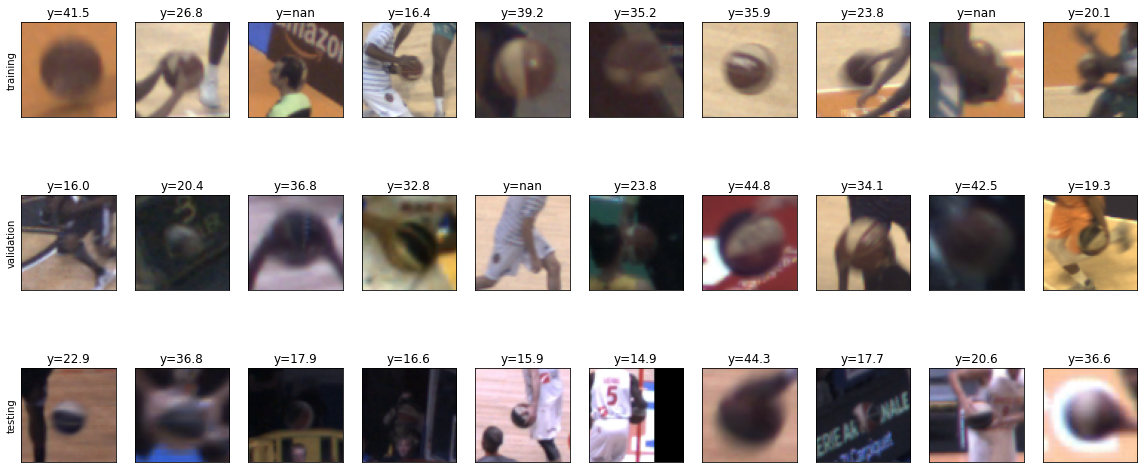

In [4]:
from matplotlib import pyplot as plt 
N = 10
fig, axes = plt.subplots(len(exp.subsets), N, figsize=(20,9))
for i, subset in enumerate(exp.subsets):
    it = iter(subset.keys)
    for j in range(N):
        item = subset.dataset.query_item(next(it))
        axes[i,j].imshow(item["input_image"])
        #axes[i,j].axis("off")
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])
        axes[i,j].set_title(f"y={item['ball_size']:.1f}")
    axes[i,0].set_ylabel(subset.name)

# Train for 10 epochs

In [5]:
exp.train(10)

epochs:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?batches/s]

Initializing model with {'batch_input_image': TensorSpec(shape=(16, 64, 64, 3), dtype=tf.uint8, name=None), 'batch_ball_size': TensorSpec(shape=(16,), dtype=tf.float64, name=None)}
Initializing 'tf.keras.applications.vgg16.VGG16' with input KerasTensor(type_spec=TensorSpec(shape=(16, 64, 64, 3), dtype=tf.float32, name=None), name='tf.math.truediv/truediv:0', description="created by layer 'tf.math.truediv'")


  0%|          | 0/22 [00:00<?, ?batches/s]

  0%|          | 0/22 [00:00<?, ?batches/s]

  0%|          | 0/22 [00:00<?, ?batches/s]

  0%|          | 0/22 [00:00<?, ?batches/s]

  0%|          | 0/22 [00:00<?, ?batches/s]

  0%|          | 0/22 [00:00<?, ?batches/s]

  0%|          | 0/22 [00:00<?, ?batches/s]

  0%|          | 0/22 [00:00<?, ?batches/s]

  0%|          | 0/22 [00:00<?, ?batches/s]

# Show inference result

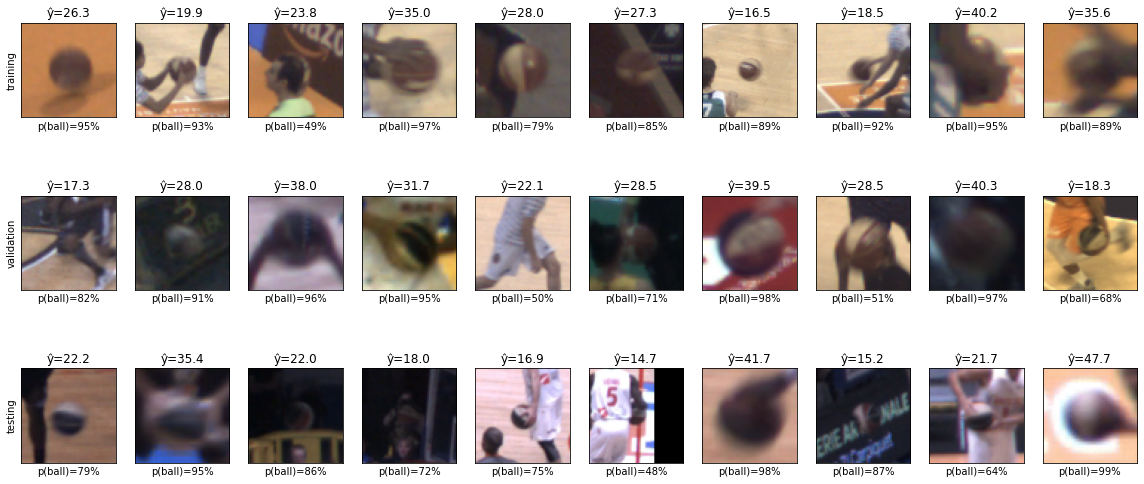

In [6]:
from matplotlib import pyplot as plt
from experimentator.dataset import collate_fn

N = 10
fig, axes = plt.subplots(len(exp.subsets), N, figsize=(20,9))
for i, subset in enumerate(exp.subsets):
    keys = subset.keys
    batch_input = subset.dataset.query(keys[0:N], collate_fn=collate_fn)
    batch_output = exp.predict(batch_input)
    for j in range(N):
        axes[i,j].imshow(batch_input["batch_input_image"][j])
        #axes[i,j].axis("off")
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])
        axes[i,j].set_xlabel(f"p(ball)={batch_output['predicted_is_ball'][j]*100:.0f}%")
        axes[i,j].set_title(f"ŷ={batch_output['predicted_diameter'][j]:.1f}")
    axes[i,0].set_ylabel(subset.name)

# Print resulting metrics

In [11]:
for metric, label in {
    "MADE": "Mean Absolute Diameter Error  [px]",
    "MAPE": "Mean Absolute Projection Error [m]",
    "MARE": "Mean Absolute Relative Error   [%]"
}.items():
    print(label, ": ", exp.state[f"testing_{metric}"])

Mean Absolute Diameter Error  [px] :  3.4947340075504267
Mean Absolute Projection Error [m] :  356.5662584754978
Mean Absolute Relative Error   [%] :  0.12224902209837048
